In [2]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv('TASK-ML-INTERN.csv')

In [5]:
df.head()

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  

[5 rows x 450 columns]

# Data Exploratory and Preprocessing

In [11]:
df.shape

(500, 450)

* Check the missing values

In [15]:
missing_values = df.isnull().sum()
missing_values[df.isnull().sum()!=0]

Series([], dtype: int64)

* We analyzed from the above that there is not any missing value in the dataset.

* Extracting feature and target

In [21]:
X = df.iloc[:, 1:-1]
y = df['vomitoxin_ppb']
sample_ids = df.iloc[:, 0]

In [23]:
X.shape

(500, 448)

In [25]:
y.shape

(500,)

In [27]:
y.describe()

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64

In [29]:
X.columns.astype(int)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447],
      dtype='int32', length=448)

In [31]:
#X.iloc[1].values

In [33]:
# df.columns.astype(int)
# This will convert original column name from string to integer. 

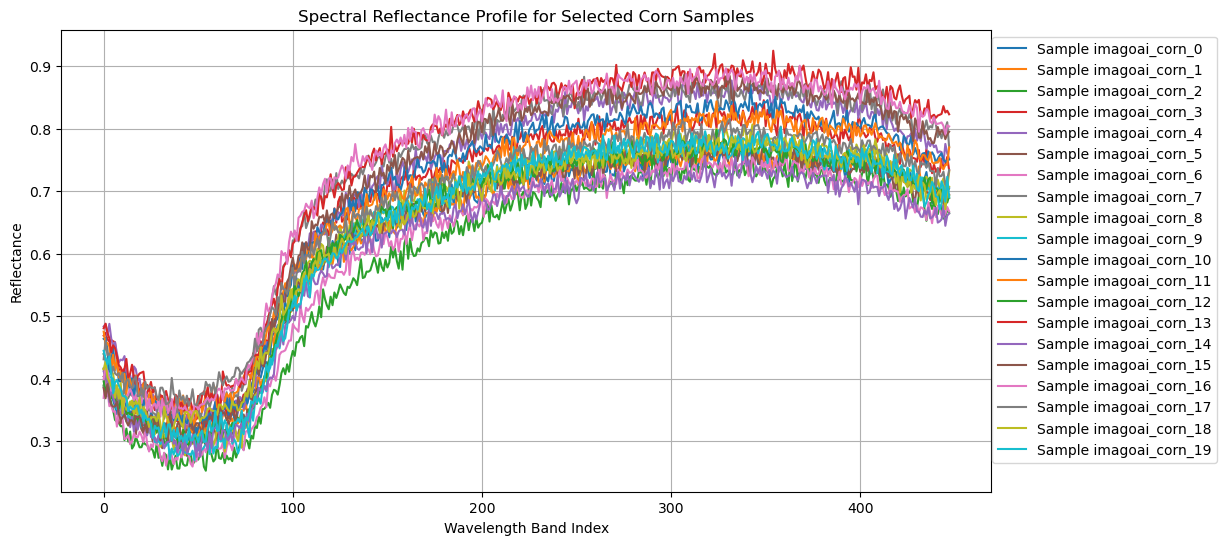

In [35]:
plt.figure(figsize=(12,6))

for i in range(20):
    plt.plot(X.columns.astype(int), X.iloc[i], label=f"Sample {sample_ids[i]}")

plt.xlabel('Wavelength Band Index')
plt.ylabel('Reflectance')
plt.title('Spectral Reflectance Profile for Selected Corn Samples')
plt.legend(loc=0, bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()
plt.savefig('Spectral_reflectance.png')

In [41]:
# 2nd Method
# Plotting the above plot using plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [43]:
fig = go.Figure()

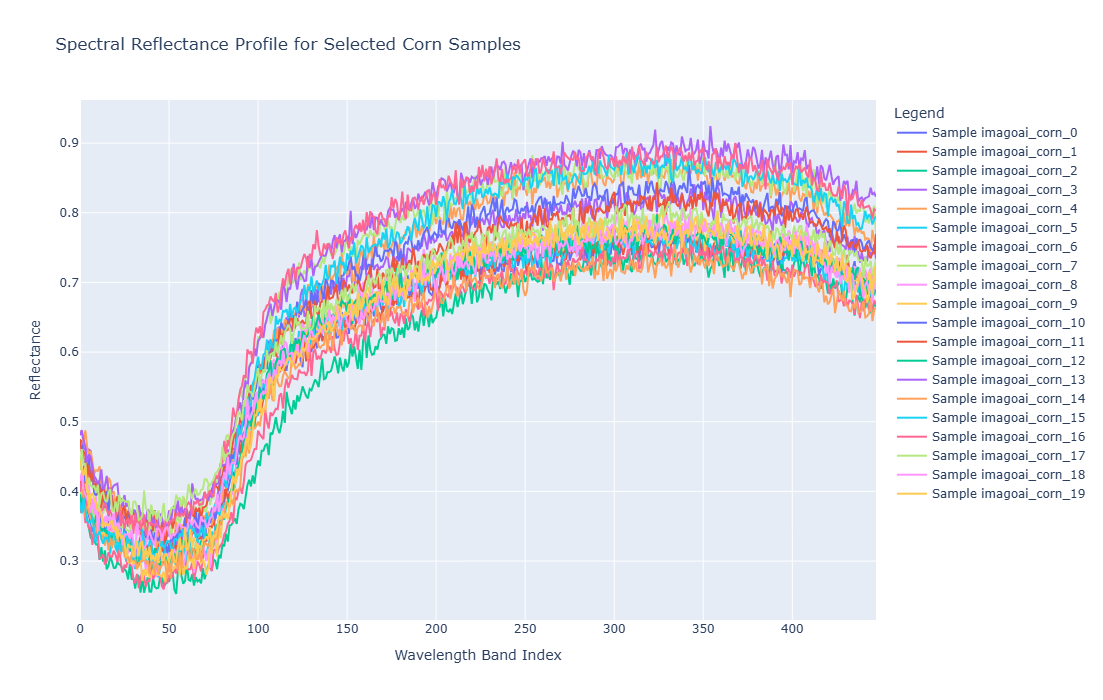

In [45]:
# Add traces for each sample
for i in range(20):
    fig.add_trace(
        go.Scatter(
            x = X.columns.astype(int),
            y = X.iloc[i],
            name = f"Sample {sample_ids[i]}"
        )
    )

# Update layout
fig.update_layout(
    title = 'Spectral Reflectance Profile for Selected Corn Samples',
    xaxis_title = 'Wavelength Band Index',
    yaxis_title = 'Reflectance',
    legend_title = 'Legend',
    height = 700,
    width = 1100
)

fig.show()

* Now creating the heatmap of the spectral data

<Figure size 640x480 with 0 Axes>

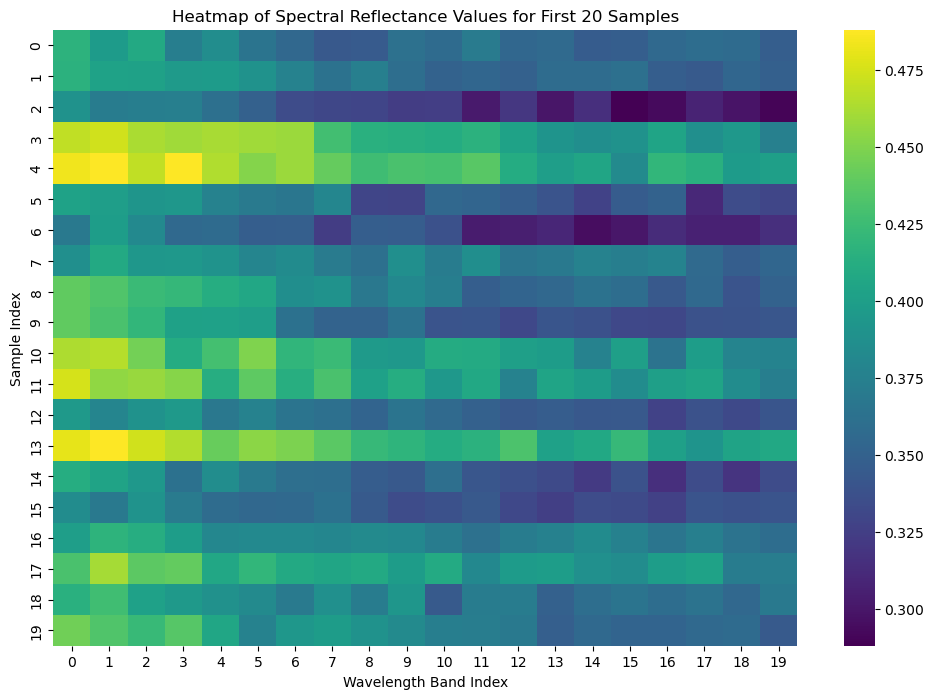

In [50]:
# Plotting heatmap of 20 rows and 20 columns
plt.figure(figsize=(12,8))
sns.heatmap(X.iloc[:20, :20], xticklabels=X.columns[:20], cmap='viridis')
plt.title('Heatmap of Spectral Reflectance Values for First 20 Samples')
plt.xlabel('Wavelength Band Index')
plt.ylabel('Sample Index')
plt.savefig('Spectral_heatmap.png')

plt.show()

* Now, I will standarize the features

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [59]:
X_scaler = scaler.fit_transform(X)

In [61]:
# Dimentionality reduction with PCA

In [63]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()    

In [67]:
X_pca = pca.fit_transform(X_scaler)
X_scaler.shape

(500, 448)

In [69]:
X_pca.shape

(500, 448)

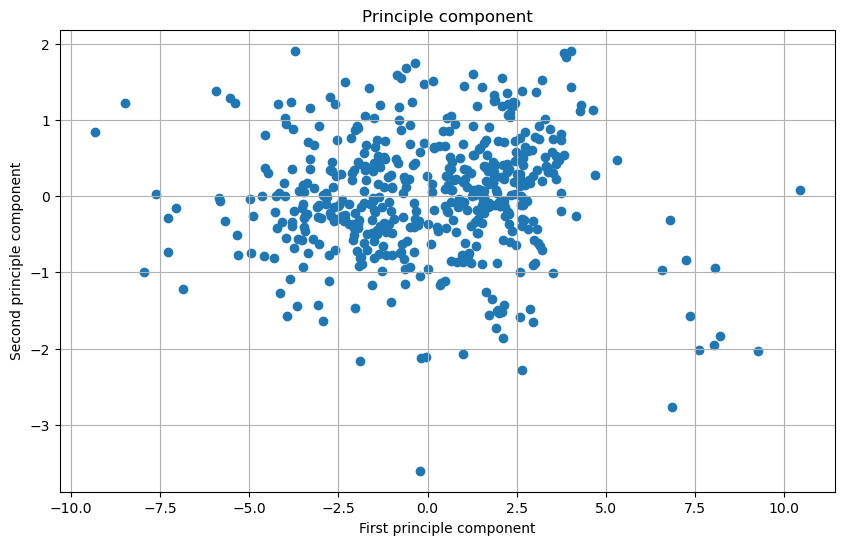

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('Principle component')
plt.grid(True)
plt.show()


In [73]:
# Explaind variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
explained_variance

array([8.58238599e-01, 6.68303715e-02, 1.91692523e-02, 1.56653424e-02,
       2.24071303e-03, 8.27068514e-04, 5.74045729e-04, 4.72138888e-04,
       4.67617794e-04, 4.41497127e-04, 4.28287858e-04, 4.15256041e-04,
       4.06475424e-04, 3.98615357e-04, 3.83680134e-04, 3.78224021e-04,
       3.74081423e-04, 3.70250322e-04, 3.65024359e-04, 3.57903132e-04,
       3.52736031e-04, 3.49544828e-04, 3.44250384e-04, 3.39403832e-04,
       3.32972630e-04, 3.30416917e-04, 3.24470747e-04, 3.17759083e-04,
       3.16268445e-04, 3.09275913e-04, 2.99935169e-04, 2.96630132e-04,
       2.95986987e-04, 2.91672476e-04, 2.90446186e-04, 2.85142009e-04,
       2.82947728e-04, 2.79728672e-04, 2.74787427e-04, 2.65150349e-04,
       2.62841716e-04, 2.60428536e-04, 2.57733550e-04, 2.54285091e-04,
       2.50777666e-04, 2.47089669e-04, 2.45846501e-04, 2.45267004e-04,
       2.38260201e-04, 2.36764505e-04, 2.34711468e-04, 2.31341575e-04,
       2.27014533e-04, 2.24684591e-04, 2.20825928e-04, 2.17923203e-04,
      

In [75]:
len(explained_variance)

448

* Now plotting explained variance 

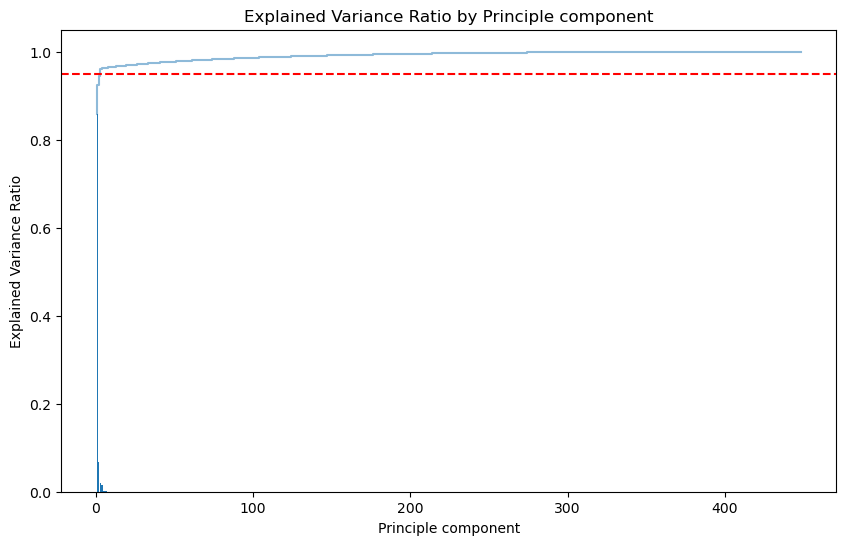

In [82]:
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, alpha=0.5, label='Cumulative Explained Variance')
plt.axhline(y=0.95, linestyle='--', color='r', label = '95% Explained variance threshold')
plt.xlabel('Principle component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principle component')
plt.savefig('pca_explained_variance.png')
plt.show()

In [84]:
# Determing the number of components required for 95% variance explained

n_component_95 = np.argmax(cumulative_variance>0.95) + 1 
n_component_95

4

* Now applying PCA with the number of components

In [87]:
pca_final = PCA(n_components=n_component_95)
X_pca_final = pca_final.fit_transform(X_scaler)

In [89]:
X_pca_final.shape    # Reduced dimension from 448 to 4 

(500, 4)

* Visualize sample in 2D PCA space

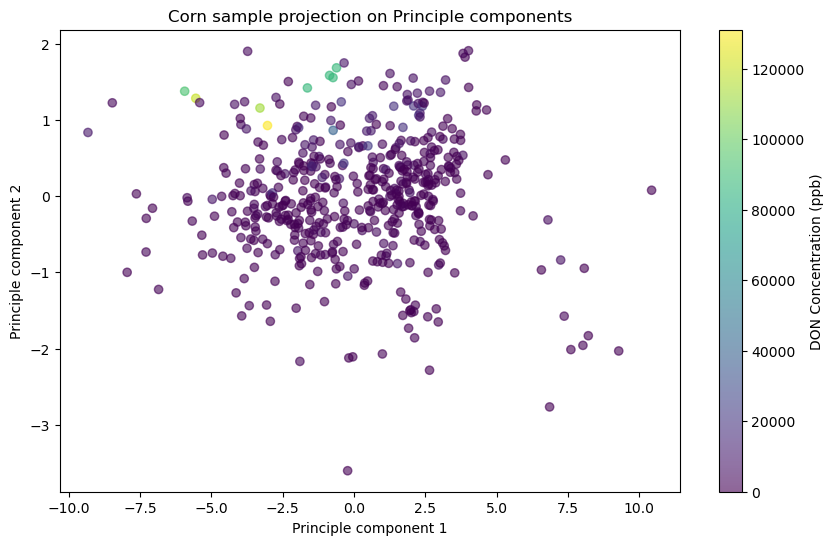

In [92]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='DON Concentration (ppb)')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('Corn sample projection on Principle components')
plt.savefig('pca_2dgrid_projection.png')
plt.show()

* Visualize the loadings (contribution of each original features to the PCs)

In [95]:
pca.components_.shape

(448, 448)

In [97]:
plt.figure(figsize=(12, 8))
components = pca.components_[:3]  # Show first three components
wavelength = pd.DataFrame(X).columns.astype(int)

In [99]:
components

array([[ 0.04879007,  0.05274193,  0.05106489, ...,  0.05068243,
         0.05087161,  0.04582724],
       [ 0.08047719,  0.08333609,  0.08322068, ..., -0.00826778,
        -0.00811572, -0.0069543 ],
       [ 0.08982046,  0.10128273,  0.09115026, ..., -0.08642398,
        -0.08714043, -0.07611152]])

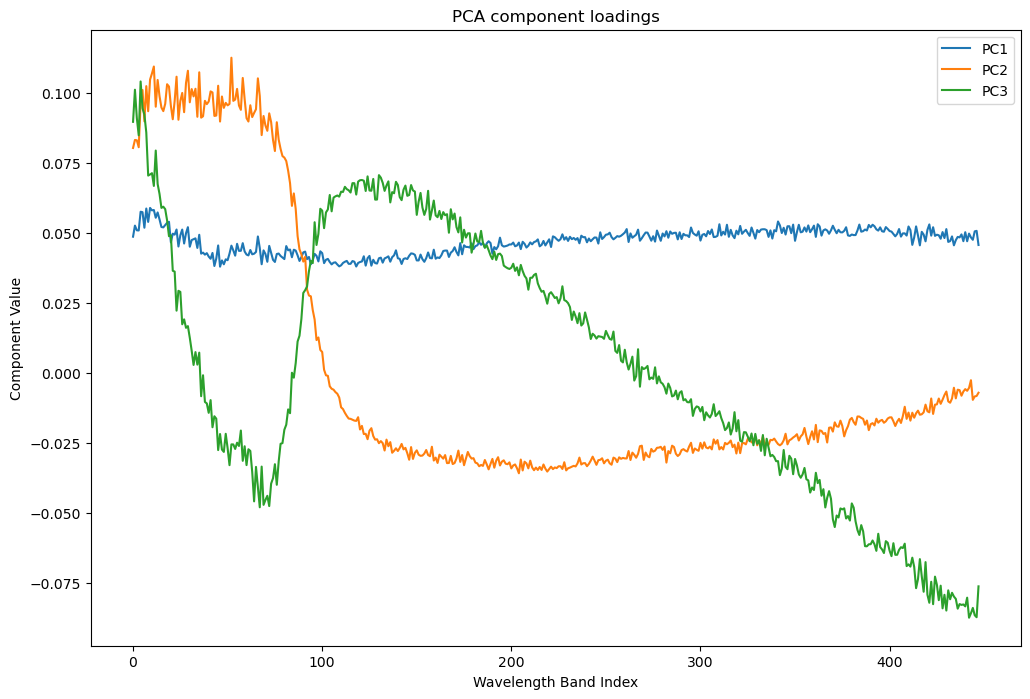

In [101]:
for i, component in enumerate(components):
    plt.plot(wavelength, component, label=f'PC{i+1}')

plt.xlabel('Wavelength Band Index')
plt.ylabel('Component Value')
plt.title('PCA component loadings')
plt.legend(loc=0)
plt.savefig('pca_loadings.png')
plt.show()

# Model Training

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=101)

In [108]:
X_train.shape

(400, 4)

In [110]:
X_test.shape

(100, 4)

In [112]:
# define and train a neural network model
#X_train.shape[1]

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [115]:
def build_nn_model(X_train):
    model = Sequential()
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer of regression

    model.compile(loss='binary_crossentropy', optimizer='Adam')
    return model

In [116]:
nn_model = build_nn_model(X_train.shape[1])

* Set up early stopping

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, restore_best_weights=True)

In [125]:
history = nn_model.fit(X_train, y_train, epochs=600, validation_split=0.2, validation_data=(X_test, y_test), batch_size=8, callbacks=[early_stop], verbose=1)

Epoch 1/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: -659.8109 - val_loss: -528.7296
Epoch 2/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -1240.2645 - val_loss: -927.0256
Epoch 3/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -2184.5999 - val_loss: -1838.2546
Epoch 4/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -3665.4866 - val_loss: -2854.3738
Epoch 5/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -14194.9502 - val_loss: -5233.2100
Epoch 6/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: -21075.4609 - val_loss: -11058.0566
Epoch 7/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -14467.3174 - val_loss: -19918.9434
Epoch 8/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -30963.6758 - val_loss: -39319.9258
Epoch 9/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: -129023.5625 - val_loss: -97632.0078
Epoch 10/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -162210.7500 - val_loss: -215689.7031
Epoch 11/600
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

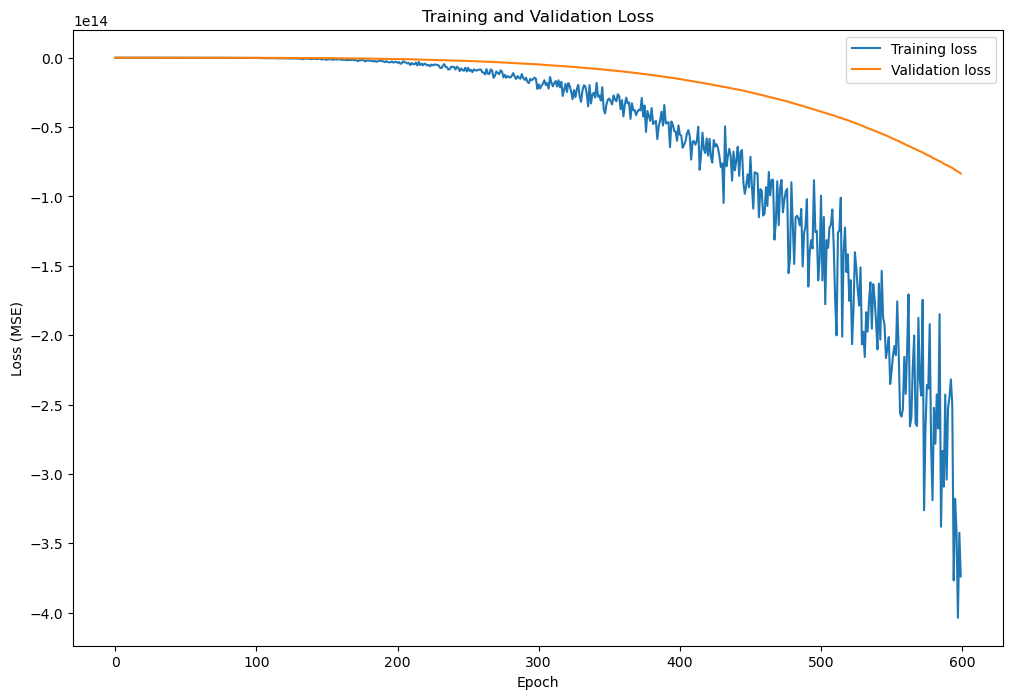

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('training_history.png')
plt.show()

# Model Evaluation

In [130]:
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_train

3806.79

In [136]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
rmse_train

14891.625170544685

In [138]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

-0.06990321253805853

In [145]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_test

1819.63

In [147]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
rmse_test

5181.693957577965

In [149]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

-0.14060309935227

In [176]:
print(f"MAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

MAE: 3806.79
RMSE: 14891.63
R2: -0.07


In [174]:
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

MAE: 1819.63
RMSE: 5181.69
R2: -0.14


* Now, Visualize actual vs predicted value

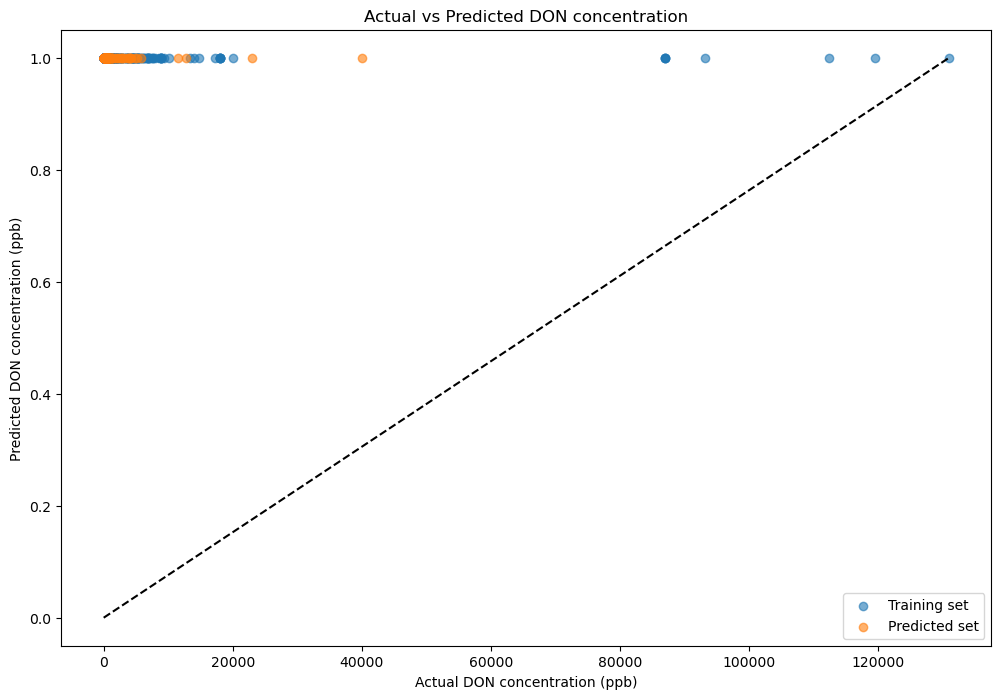

In [156]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, label='Training set', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Predicted set', alpha=0.6)
plt.plot([0, max(y_train.max(), y_test.max())], [0, max(y_train_pred.max(), y_test_pred.max())], 'k--')
plt.xlabel('Actual DON concentration (ppb)')
plt.ylabel('Predicted DON concentration (ppb)')
plt.title('Actual vs Predicted DON concentration')
plt.legend()
plt.savefig('actual_vs_predicted.png')
plt.show()


# Compare with Random Forest Model

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)

In [163]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [164]:
y_pred_rf = rf_model.predict(X_test)

In [167]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [169]:
print(f"MAE of rf model : {mae_rf:.2f}")
print(f"MSE of rf model : {rmse_rf:.2f}")
print(f"R2 of rf model : {r2_rf:.2f}")

MAE of rf model : 2808.07
MSE of rf model : 13656.16
R2 of rf model : -6.92


In [171]:
print("\nSummary of Findings:")
print("1. The hyperspectral data contains", X.shape[1], "spectral bands per sample.")
print(f"2. PCA reduced the dimensions from {X.shape[1]} to {n_component_95} while preserving 95% of variance.")
print(f"3. Neural Network performance - Test R²: {r2_test:.4f}, RMSE: {rmse_test:.2f}")
print(f"4. Random Forest performance - Test R²: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")


Summary of Findings:
1. The hyperspectral data contains 448 spectral bands per sample.
2. PCA reduced the dimensions from 448 to 4 while preserving 95% of variance.
3. Neural Network performance - Test R²: -0.1406, RMSE: 5181.69
4. Random Forest performance - Test R²: -6.9222, RMSE: 13656.16


# Thank You 